# Supervised Machine Learning Classification Final Project

## Objectives
- Predict the likelihood of customer purchases.
- Gain insight into the features that most influence customer to make a purchase.
- Compare the performance of difference ensemble models and improvement over Logistic Regression


# Introduction

This project analyses real world consumer purchase behavior. The dataset is available in 
https://www.kaggle.com/code/katerynameleshenko/customer-purchase-behavior-prediction/input

We will train ensemble models to predict the likelihood of a customer's decision to make a purchase and to evaluate the models' performances. Additionally, we aim to gain insights into the most important variables that influence a customer's likelihood of making a purchase.


In [1]:
def warn(*args, **kwargs):
    pass


import warnings

warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import the data from local directory. The data can be downloaded from link above as well. 


In [3]:
file = "data/customer_purchase.csv"
data = pd.read_csv(file)

## Exploratory Data Analysis

- There are a total of 9 features, including our target variable 'PurchaseStatus' (0: No, 1: Yes).

Some of the features descriptions are: 
- Product Category: (0: Electronics, 1: Clothing, 2: Home Goods, 3: Beauty, 4: Sports)
- Time Spent on Website: Time spent by the customer on the website in minutes
- Discounts Availed: Number of discounts availed by the customer (range: 0-5)

All features are pre processed, so we do not need to do encoding. 

However, we will scale the data to ensure a consistent distribution. 

All observations are in number formats, with 'Age', 'Annual Income', 'Number Of Purchases' and ' Time Spent On Website' being numerical features; 'Gender', 'Loyalty Program' being Binary and 'Product Category', 'Discounts Availed' being categorical features. 


In [4]:
print("Shape", data.shape)
print("dtypes", data.dtypes)
print(data.head(5))

Shape (1500, 9)
dtypes Age                     int64
Gender                  int64
AnnualIncome          float64
NumberOfPurchases       int64
ProductCategory         int64
TimeSpentOnWebsite    float64
LoyaltyProgram          int64
DiscountsAvailed        int64
PurchaseStatus          int64
dtype: object
   Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0   40       1   66120.267939                  8                0   
1   20       1   23579.773583                  4                2   
2   27       1  127821.306432                 11                2   
3   24       1  137798.623120                 19                3   
4   31       1   99300.964220                 19                1   

   TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0           30.568601               0                 5               1  
1           38.240097               0                 5               0  
2           31.633212               1                 0 

In [5]:
round(data.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,44.30,15.54,18.00,31.00,45.00,57.00,70.00
Gender,1500.0,0.50,0.50,0.00,0.00,1.00,1.00,1.00
AnnualIncome,1500.0,84249.16,37629.49,20001.51,53028.98,83699.58,117167.77,149785.18
NumberOfPurchases,1500.0,10.42,5.89,0.00,5.00,11.00,15.00,20.00
ProductCategory,1500.0,2.01,1.43,0.00,1.00,2.00,3.00,4.00
TimeSpentOnWebsite,1500.0,30.47,16.98,1.04,16.16,30.94,44.37,59.99
LoyaltyProgram,1500.0,0.33,0.47,0.00,0.00,0.00,1.00,1.00
DiscountsAvailed,1500.0,2.56,1.71,0.00,1.00,3.00,4.00,5.00
PurchaseStatus,1500.0,0.43,0.50,0.00,0.00,0.00,1.00,1.00


- Split the data: -  'y' stores our target 'PurchaseStatus', 'X' stores the rest of the features

In [6]:
X, y = data.iloc[:, :8], data.iloc[:, -1]
X.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
0,40,1,66120.267939,8,0,30.568601,0,5
1,20,1,23579.773583,4,2,38.240097,0,5
2,27,1,127821.306432,11,2,31.633212,1,0
3,24,1,137798.623120,19,3,46.167059,0,4
4,31,1,99300.964220,19,1,19.823592,0,0


Features are not strongly correlated with the target feature nor with other features.

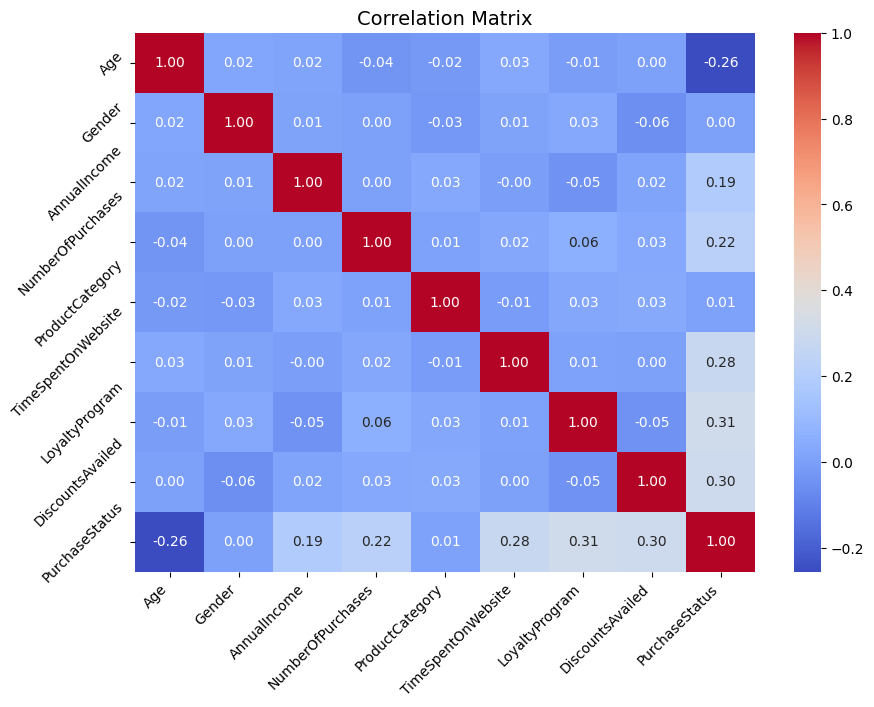

In [7]:
fix, ax = plt.subplots(figsize=(10, 7))
heatmap = sns.heatmap(
    data.corr(), annot=True, fmt=".02f", cmap="coolwarm", annot_kws={"size": 10}
)
# ax.tick_params(labelsize=10)
ax.set_xticklabels(data.columns, fontsize=10, rotation=45, ha="right")
ax.set_yticklabels(data.columns, fontsize=10, rotation=45, ha="right")
ax.set_title("Correlation Matrix", fontsize=14)
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=10)
plt.show()

Scale the data

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

Distribution of the target variable is not very skewed, we can do regular split. 

PurchaseStatus
0    0.568
1    0.432
Name: proportion, dtype: float64


<Axes: xlabel='PurchaseStatus'>

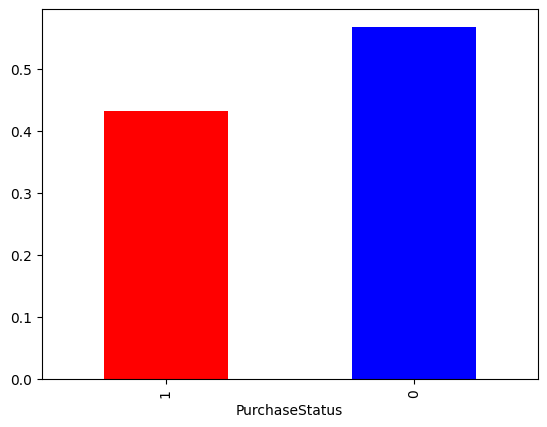

In [9]:
y_norm = y.value_counts(normalize=True)
print(y_norm)
y_norm.sort_values().plot.bar(color=["red", "blue"])

Splitting the data with 0.2 ratio of test to train sets. 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1200, 8), (300, 8), (1200,), (300,))

## Logistic Regression
First let's see the performance given by LR with L2 penalty as our base line. 

In [11]:
from sklearn.linear_model import LogisticRegression

# L2 regularized logistic regression
LR_L2 = LogisticRegression(penalty="l2", max_iter=500, solver="liblinear").fit(
    X_train, y_train
)

y_pred_lrl2 = LR_L2.predict(X_test)
print(classification_report(y_pred_lrl2, y_test))

confusion_matrix(y_test, y_pred_lrl2)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       175
           1       0.79      0.77      0.78       125

    accuracy                           0.82       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.82      0.82      0.82       300



array([[149,  29],
       [ 26,  96]])

## Gradient Boosting Classification
- As expected, Logistic Regression does not give very good performance.
- Let's use ensemble method, we will start with Gradient Boosting Classification.
- We will use number of trees as the hyperparameter and plot the error curve to find out the best number.

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
tree_list = list(range(30, 70, 1))
error_list = list()

gbc = GradientBoostingClassifier()
for n_trees in tree_list:
    gbc.set_params(n_estimators=n_trees, random_state=123, learning_rate=0.1)

    gbc.fit(X_train, y_train)

    y_pred = gbc.predict(X_test)

    error = 1.0 - accuracy_score(y_test, y_pred)
    error_list.append(pd.Series({"n_trees": n_trees, "error": error}))

error_df = pd.concat(error_list, axis=1).T.set_index("n_trees")

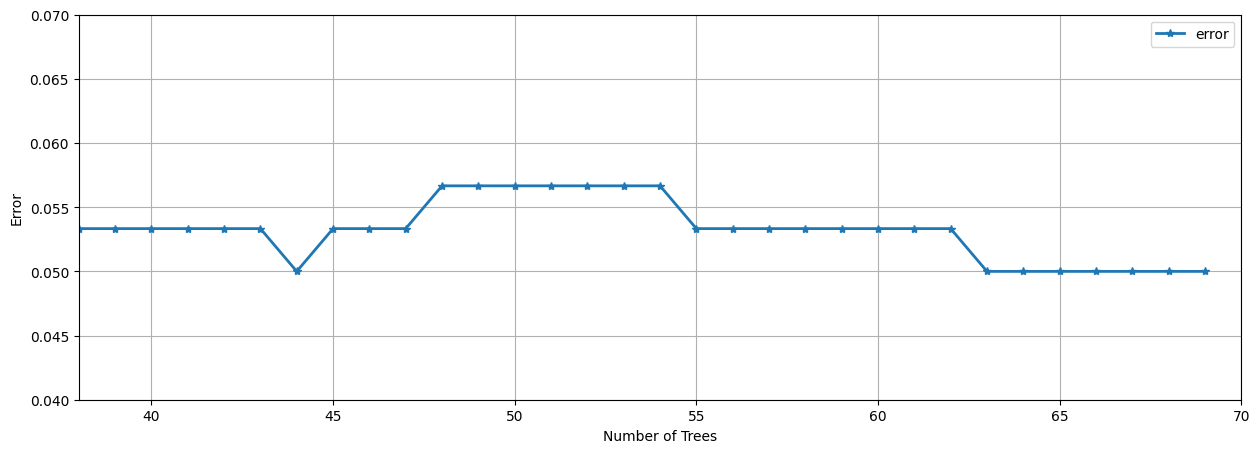

In [14]:
ax = error_df.plot(marker="*", figsize=(15, 5), linewidth=2)
ax.set(xlabel="Number of Trees", ylabel="Error")

min = round(error_df.min() * 0.9, 3)
max = round(error_df.max() * 1.5, 3)
ax.set_ylim(0.04, 0.07)
ax.set_xlim(38, 70)
plt.grid()

Looks like 44 is a good number of estimator we should pick. 

In [15]:
model_gbc = GradientBoostingClassifier(n_estimators=44, random_state=123)
model_gbc.fit(X_train, y_train)
y_pred_gbc = model_gbc.predict(X_test)

print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       178
           1       0.96      0.92      0.94       122

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.95       300
weighted avg       0.95      0.95      0.95       300



In [16]:
confusion_matrix(y_test, y_pred_gbc)

array([[173,   5],
       [ 10, 112]])

The model returns much improve performance. The Recall for the 'NOT' Purchase is better than 'YES' Purchase although the Precision values are equal. 

## Random Forest Classifier
Next we want to find out if we can imporve our accuracy with Random Forest with GridsearchCV and some hyperparameters. 

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestClassifier()
param_grid = {
    "n_estimators": [2 * n + 1 for n in range(20)],
    "max_depth": [2 * n + 1 for n in range(10)],
    "max_features": [None, "sqrt", "log2"],
}
search = GridSearchCV(estimator=model_rf, param_grid=param_grid, scoring="accuracy")
search.fit(X_train, y_train)

/Users/ohmyp/Documents/Tutorials/IBM-ML/code/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [18]:
print("best score", search.best_score_)
print("best params", search.best_params_)

best score 0.9233333333333335
best params {'max_depth': 11, 'max_features': 'log2', 'n_estimators': 25}


In [19]:
best_model_rf = search.best_estimator_
y_preds_rf = best_model_rf.predict(X_test)
print(classification_report(y_test, y_preds_rf))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       178
           1       0.92      0.89      0.90       122

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [20]:
confusion_matrix(y_test, y_preds_rf)

array([[168,  10],
       [ 13, 109]])

- The Random Forest model performance metrics drop about 0.01 points overall when compared with GradientBoosting. 
- Let's plot ROC and Precision-Recall curves for both models.

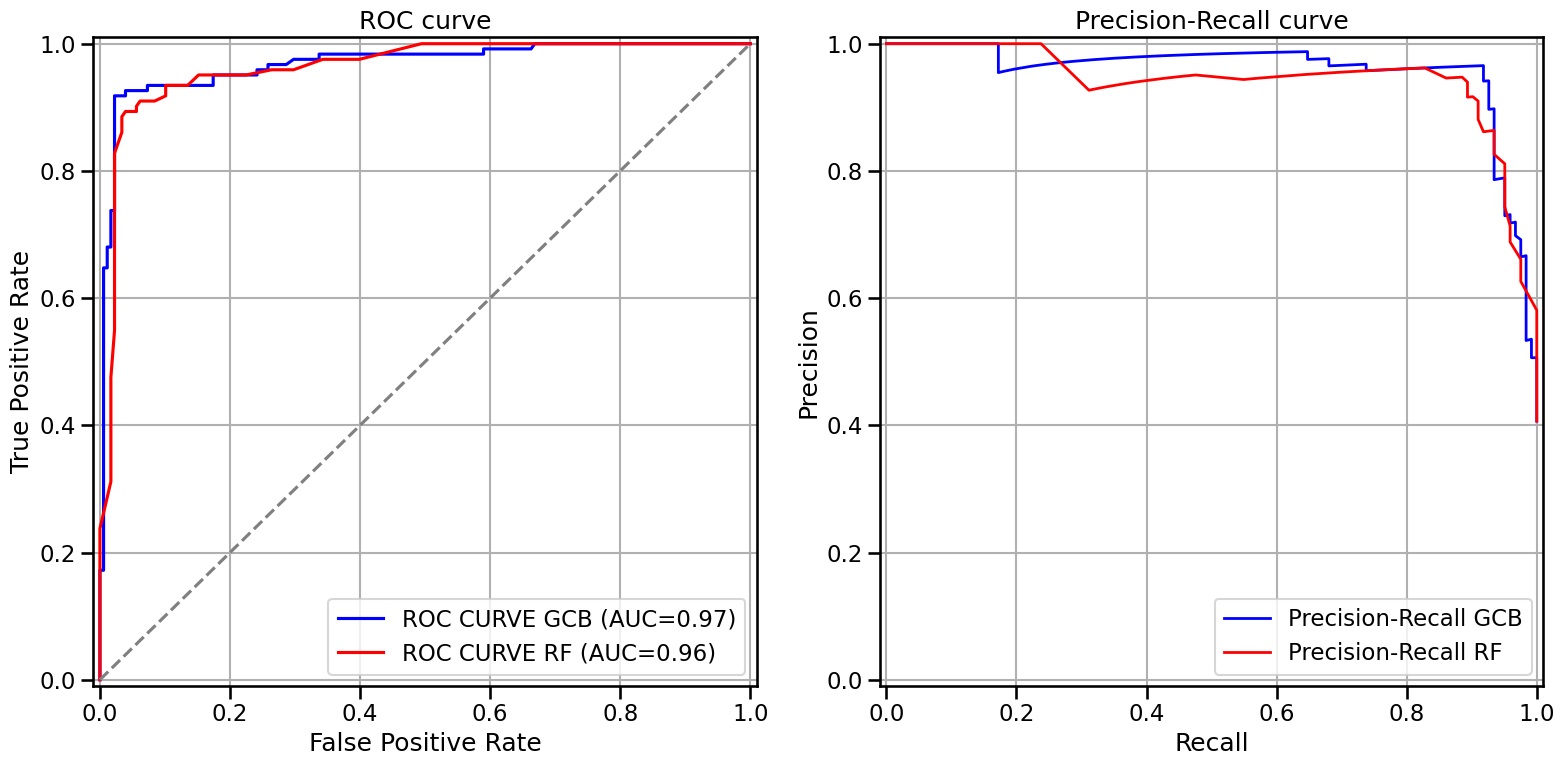

In [21]:
# ROC AUC
sns.set_context("talk")

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)
# Predict probabilities on the test set
y_pred_proba_gbc = model_gbc.predict_proba(X_test)[:, 1]
y_pred_proba_rf = best_model_rf.predict_proba(X_test)[:, 1]

ax1, ax2 = axList[0], axList[1]

# Compute ROC curve
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_pred_proba_gbc)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

# Compute AUC score
auc_score_gbc = roc_auc_score(y_test, y_pred_proba_gbc)
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Plot ROC curve
# ax.figure(figsize=(10, 6))
ax1.plot(
    fpr_gbc, tpr_gbc, color="blue", label=f"ROC CURVE GBC (AUC={auc_score_gbc:.2f})"
)
ax1.plot(fpr_rf, tpr_rf, color="red", label=f"ROC CURVE RF (AUC={auc_score_rf:.2f})")
ax1.plot([0, 1], [0, 1], color="gray", linestyle="--")
ax1.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    xlim=[-0.01, 1.01],
    ylim=[-0.01, 1.01],
    title="ROC curve",
)
ax1.legend(loc="lower right")
ax1.grid(True)

# Plot the precision-recall curve

precision_gbc, recall_gbc, _ = precision_recall_curve(y_test, y_pred_proba_gbc)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
ax2.plot(
    recall_gbc, precision_gbc, color="blue", label="Precision-Recall GBC", linewidth=2
)
ax2.plot(recall_rf, precision_rf, color="red", label="Precision-Recall RF", linewidth=2)
ax2.set(
    xlabel="Recall",
    ylabel="Precision",
    xlim=[-0.01, 1.01],
    ylim=[-0.01, 1.01],
    title="Precision-Recall curve",
)
ax2.legend(loc="lower right")
ax2.grid(True)
plt.tight_layout()

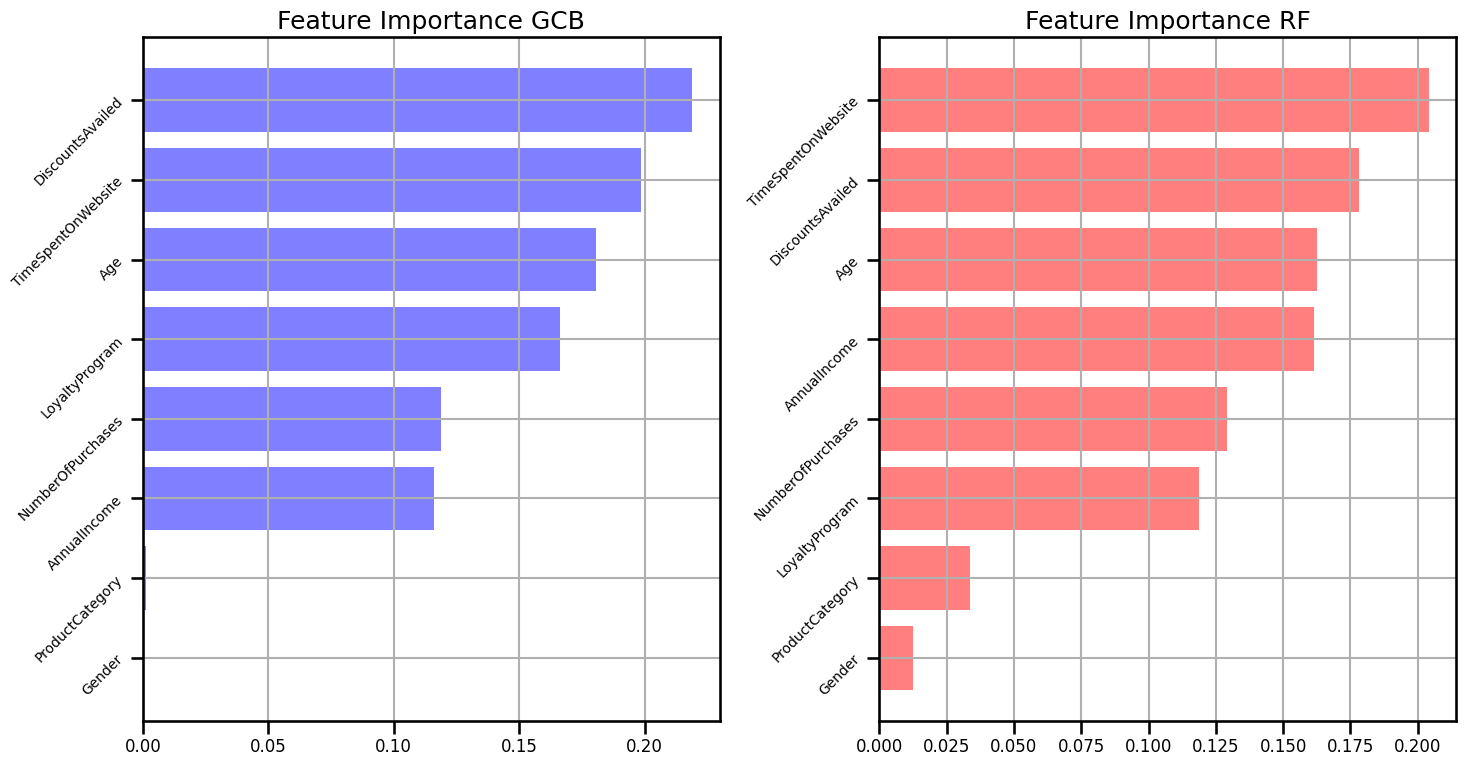

In [22]:
# Plot Feature Importance

feature_importances_gbc = model_gbc.feature_importances_
feature_importances_rf = best_model_rf.feature_importances_

features = data.columns[:-1]
sns.set_context("talk")

# sort the feature
sorted_idx_gbc = np.argsort(feature_importances_gbc)
sorted_fimportance_gbc = feature_importances_gbc[sorted_idx_gbc]
sorted_feature_gbc = features[sorted_idx_gbc]

sorted_idx_rf = np.argsort(feature_importances_rf)
sorted_fimportance_rf = feature_importances_rf[sorted_idx_rf]
sorted_feature_rf = features[sorted_idx_rf]

fig, axList = plt.subplots(ncols=2)
ax1, ax2 = axList[0], axList[1]
fig.set_size_inches(15, 8)

# GBC bar plot
ax1.barh(sorted_feature_gbc, sorted_fimportance_gbc, color="blue", alpha=0.5)
# GBC plot Set labels and tickers
ax1.set_yticks(range(len(sorted_feature_gbc)))
ax1.set_yticklabels(sorted_feature_gbc, fontsize=10, rotation=45, ha="right")
ax1.tick_params(axis="x", labelsize=12)
ax1.set_title("Feature Importance GBC")

# RF bar plot
ax2.barh(sorted_feature_rf, sorted_fimportance_rf, color="red", alpha=0.5)
# RF plot Set labels and tickers
ax2.set_yticks(range(len(sorted_feature_rf)))
ax2.set_yticklabels(sorted_feature_rf, fontsize=10, rotation=45, ha="right")
ax2.tick_params(axis="x", labelsize=12)
ax2.set_title("Feature Importance RF")

ax1.grid(True)
ax2.grid(True)
plt.tight_layout()

## Conclusion

- Both ensemble models, GradientBoosting and RandomForest, show significant improvement over Logistic Regression.
- The classification report metrics indicate a slight edge of 0.01 points in performance for GradientBoosting compared to RandomForest.
- GradientBoosting identifies 'DiscountsAvailable' as the top contributor to purchase likelihood, while the RandomForest model highlights 'TimeSpentOnWebsite' as the most important feature.
- Both models agree that the top three important features are 'Discounts Available', 'Time Spent On Website', and 'Age'.


### Thank you for reading this report!

# Author

<a href="https://www.linkedin.com/in/narumolpugkhem/"> Narumol Pugkhem </a>

Date 2024-08-04